In [1]:
import TheHawkesPackage as THP
import numpy as np

# Exponential Hawkes process

The first simulation we are going to look at is the most simple but also most prominent type of Hawkes processes, the exponential type Hawkes process. In this case, the kernel is defined via an exponential function, i.e.,
$$h(x) = \alpha\mathrm{exp}(-\beta x)$$.
The class "ExponentialHawkes" offers you a ready to run simulation based on a list of inputs of length 2 containing the parameters $\alpha$ and $\beta$. Recall that $\frac{\alpha}{\beta}<1$ should be satisfied to avoid explosion
(the simulation will in any case give you a fitting result, so you may "see" explosion when choosing parameters outside this bound). 

In [2]:
%%capture 
# Just to not show all the generated events. Avoids output but saves variables
G = THP.ExponentialHawkes(np.array([2,5,1]))
k = 100
G.propagate_by_k_events(k)

In [3]:
x_G = np.linspace(0,G.Events[-1],1000)
y_G,z_G = G.intensity_over_interval(x_G)

In [4]:
import matplotlib.pyplot as plt

plt.plot(y_G,z_G)
plt.show()

<Figure size 640x480 with 1 Axes>

# Monotone Hawkes process

A widely used class of Hawkes processes are characterized by their monotonously decreasing kernels. This can be seen as an inital even that instantanously increases the intensity but whichs impact then faints over time. The exponential case is a spacial case of the monotone Hawkes process. The THP class furthermore allows nonlinearities that are monotonously increasing and defined on $[0,\infty)$. Just give an optional input `nonlinearity`. 
You may, thus, check stability numerically for your process to get a first intuition about its behaviour.

In [5]:
H = THP.MonotoneKernelHawkes(lambda x: 1*np.exp(-10*x), nonlinearity= lambda x: np.exp(x))

In [6]:
H.propagate_by_k_events(500)

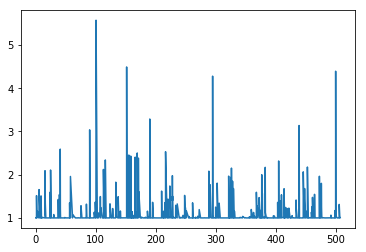

In [7]:
x = np.linspace(0,H.Events[-1],100)
y,z = H.intensity_over_interval(x)


plt.plot(y,z)
plt.show()

# Hawkes processes with bell shaped kernels

Hawkes processes with in the widest sense bell shaped kernels, for example triangular kernels, which have exactly one extremum, being a global maximum, give a modeling approach for intensities that do not jump immediately as soon as an event takes place but rather let it grow over time before decaying again. 
This THP class also allows monotonously increasing nonlinearities.

In [12]:
def triangular_kernel(x):
    Growing_region = x > 0 and x < 1/2
    Decaying_region = x > 1/2 and x < 1
    return 2*x*Growing_region + (-2*x+2)*Decaying_region
    
K = THP.BellShapeHawkes(triangular_kernel)

In [13]:
K.propogate_by_amount(50)

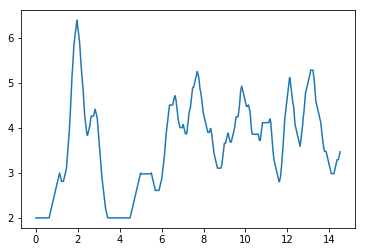

In [14]:
x_K = np.linspace(0,K.Events[-1],1000)
y_K,z_K = K.intensity_over_interval(x_K)

plt.plot(y_K,z_K)
plt.show()